In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
qadf = pd.read_csv('res_qa.csv')

# Compare models by spacy similarity score

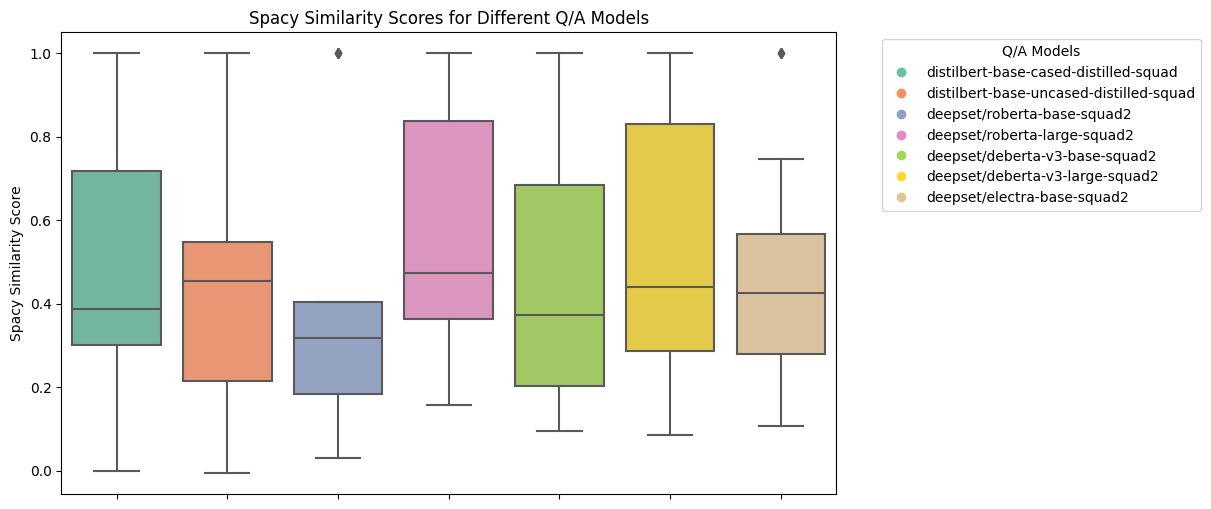

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

bp = sns.boxplot(x='qa_model', y='spacy_sim', data=qadf, palette=palette)

plt.title('Spacy Similarity Scores for Different Q/A Models')
plt.ylabel('Spacy Similarity Score')
bp.set_xticklabels([])
bp.set_xlabel(None)

palette = sns.color_palette('Set2', n_colors=len(qadf['qa_model'].unique()))
legend_labels = {model: color for model, color in zip(qadf['qa_model'].unique(), palette)}
handles = [plt.Line2D([0], [0], color=color, marker='o', linestyle='', label=model) for model, color in legend_labels.items()]
plt.legend(title='Q/A Models', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Compare contexts using spacy similarity score

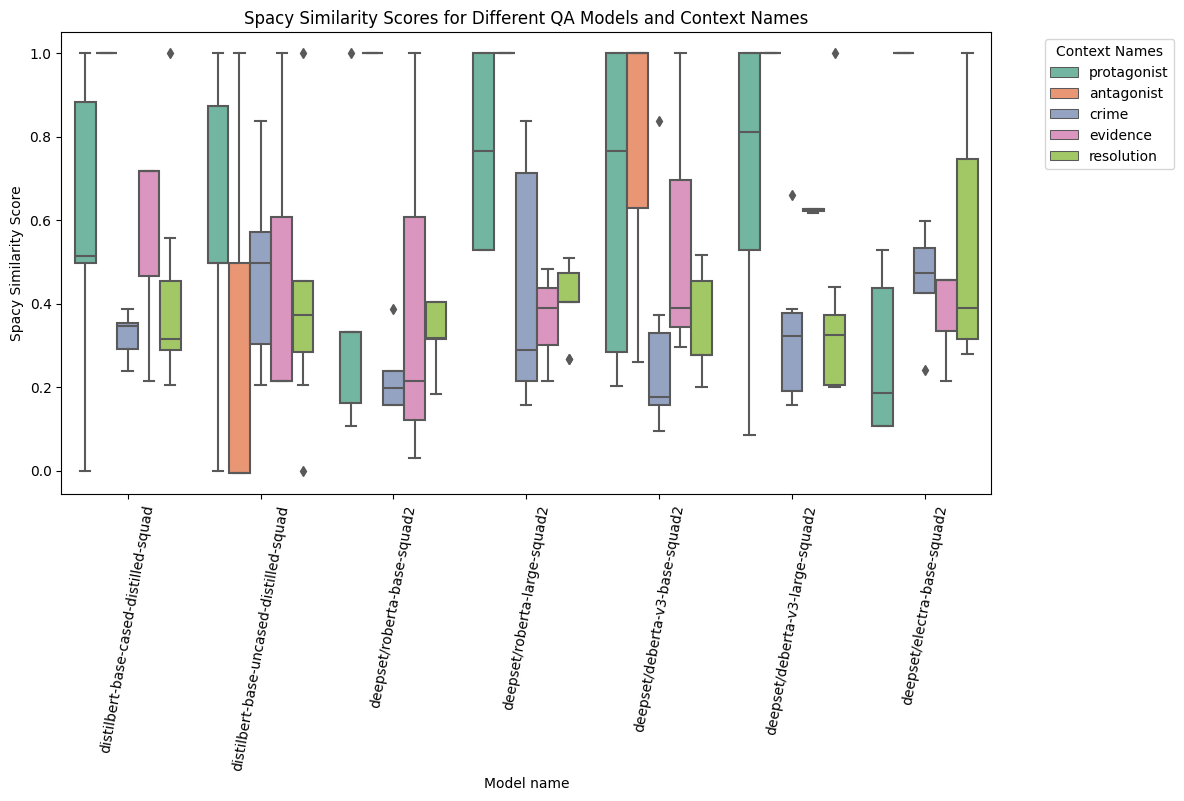

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

palette = sns.color_palette('Set2', n_colors=len(qadf['qa_model'].unique()))

bp = sns.boxplot(x='qa_model', y='spacy_sim', hue='ctx_name', data=qadf, palette=palette, ax=ax)

ax.set_title('Spacy Similarity Scores for Different QA Models and Context Names')
ax.set_xlabel('Model name')
ax.set_ylabel('Spacy Similarity Score')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Context Names', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=80)

plt.show()


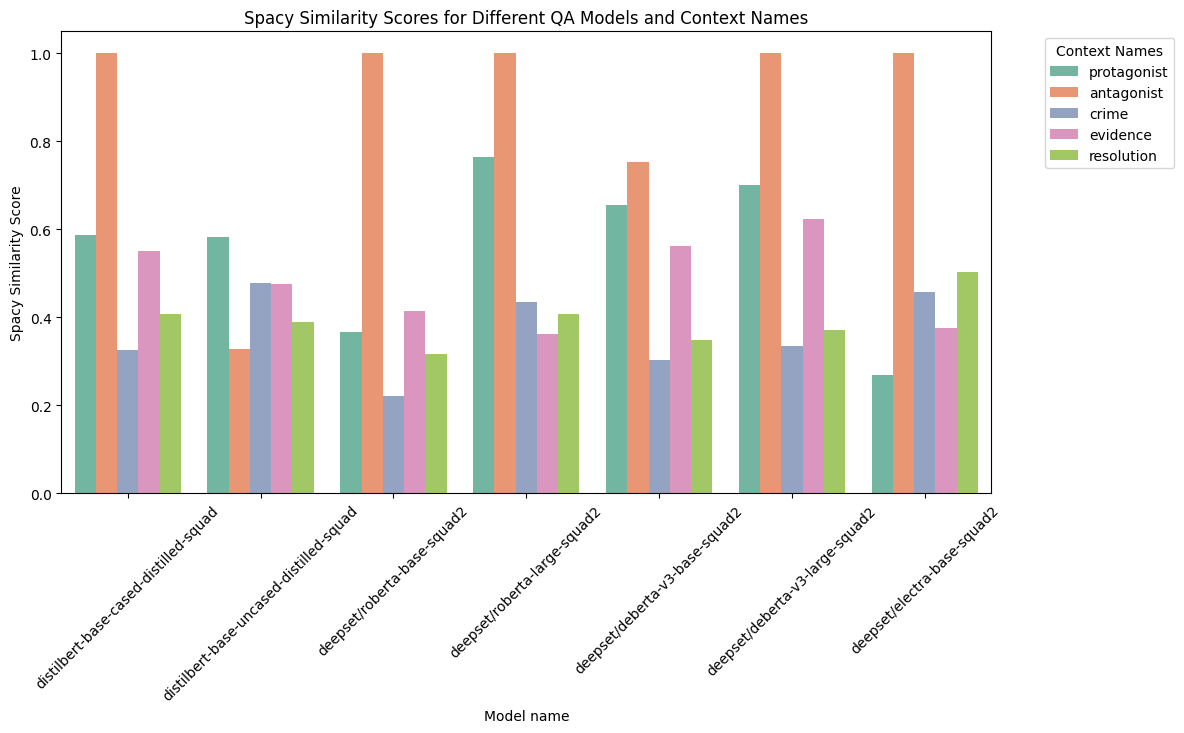

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

palette = sns.color_palette('Set2', n_colors=len(qadf['qa_model'].unique()))

sns.barplot(x='qa_model', y='spacy_sim', hue='ctx_name', data=qadf, palette=palette, ax=ax, ci=None)

ax.set_title('Spacy Similarity Scores for Different QA Models and Context Names')
ax.set_xlabel('Model name')
ax.set_ylabel('Spacy Similarity Score')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Context Names', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)

plt.show()


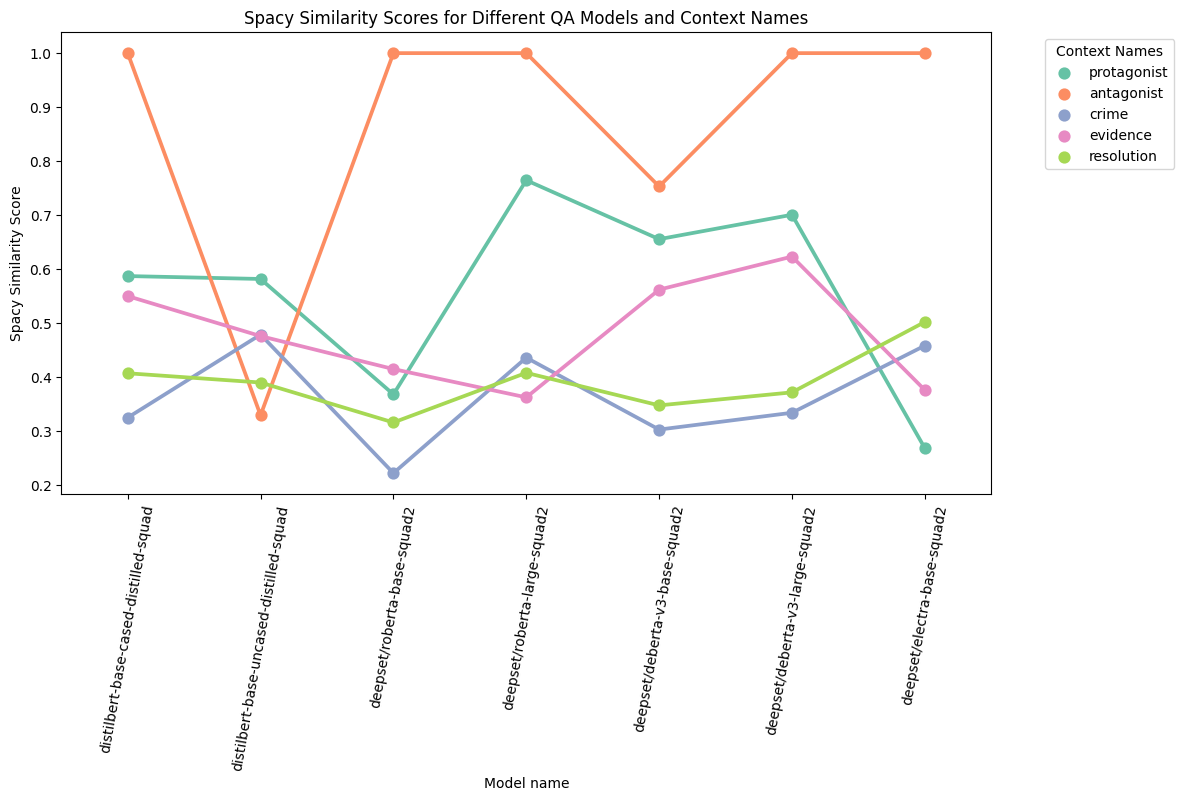

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

palette = sns.color_palette('Set2', n_colors=len(qadf['qa_model'].unique()))

sns.pointplot(x='qa_model', y='spacy_sim', hue='ctx_name', data=qadf, palette=palette, ax=ax, ci=None)

ax.set_title('Spacy Similarity Scores for Different QA Models and Context Names')
ax.set_xlabel('Model name')
ax.set_ylabel('Spacy Similarity Score')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Context Names', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=80)
plt.show()


# Compare Spacy similarity scores for each question-answer pair across different models.

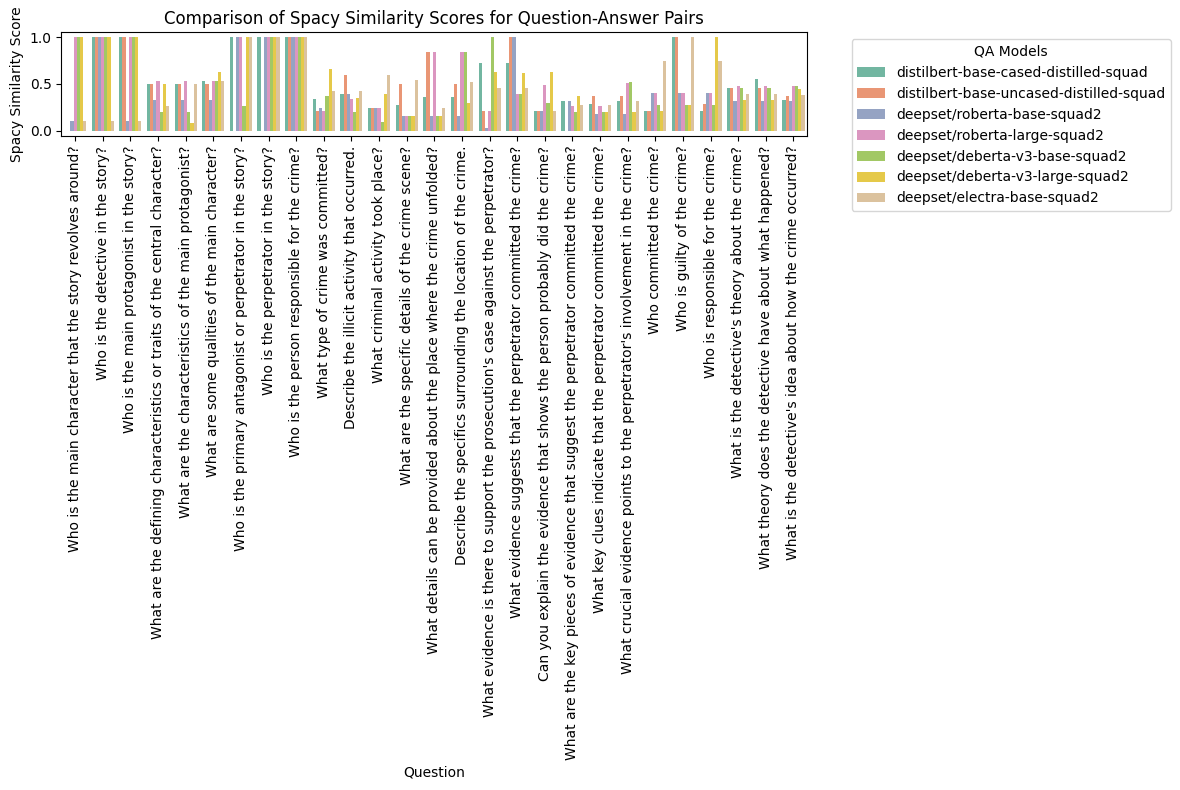

In [101]:
plt.figure(figsize=(12, 8))
sns.barplot(x='q_text', y='spacy_sim', hue='qa_model', data=qadf, palette='Set2')
plt.title('Comparison of Spacy Similarity Scores for Question-Answer Pairs')
plt.xlabel('Question')
plt.ylabel('Spacy Similarity Score')
plt.legend(title='QA Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

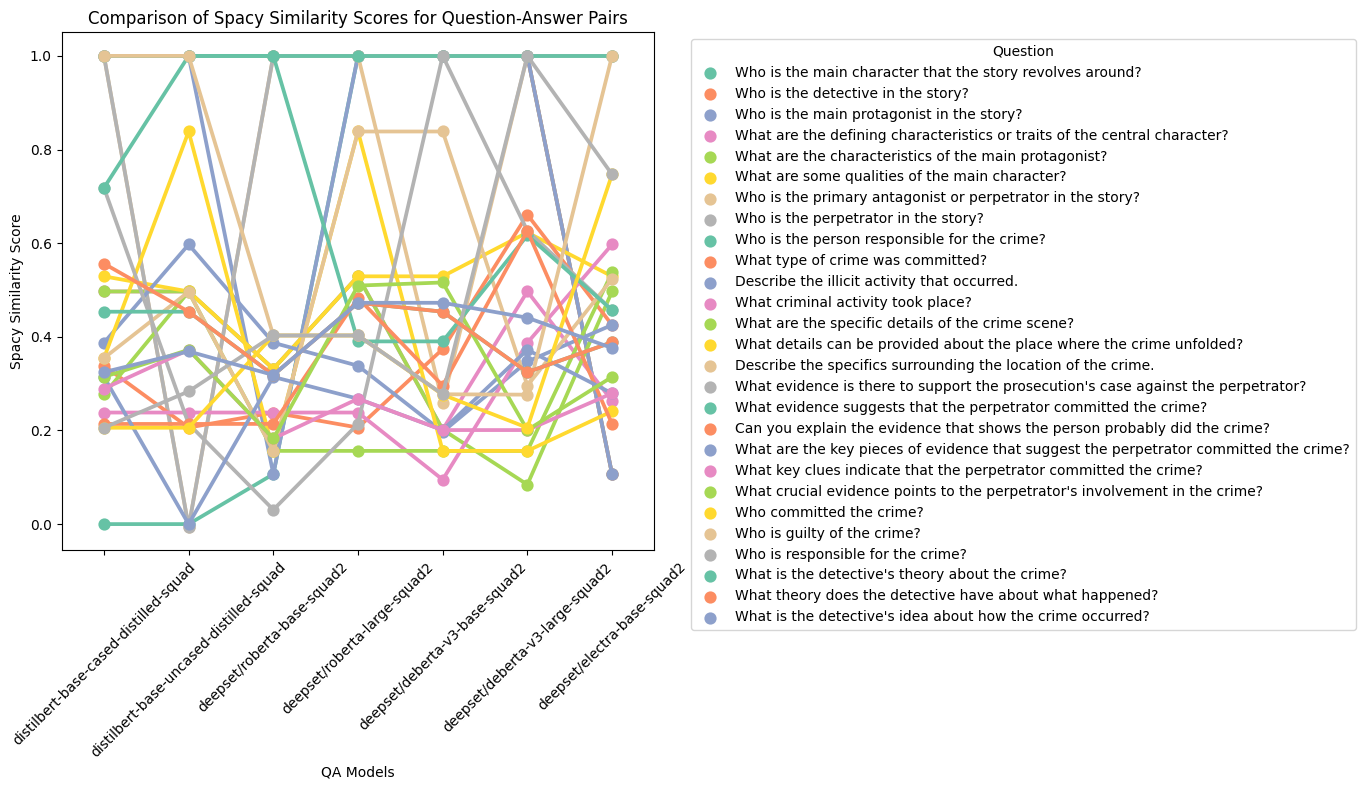

In [88]:
plt.figure(figsize=(14, 8))
sns.pointplot(x='qa_model', y='spacy_sim', hue='q_text', data=qadf, palette='Set2')
plt.title('Comparison of Spacy Similarity Scores for Question-Answer Pairs')
plt.xlabel('QA Models')
plt.ylabel('Spacy Similarity Score')
plt.legend(title='Question', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


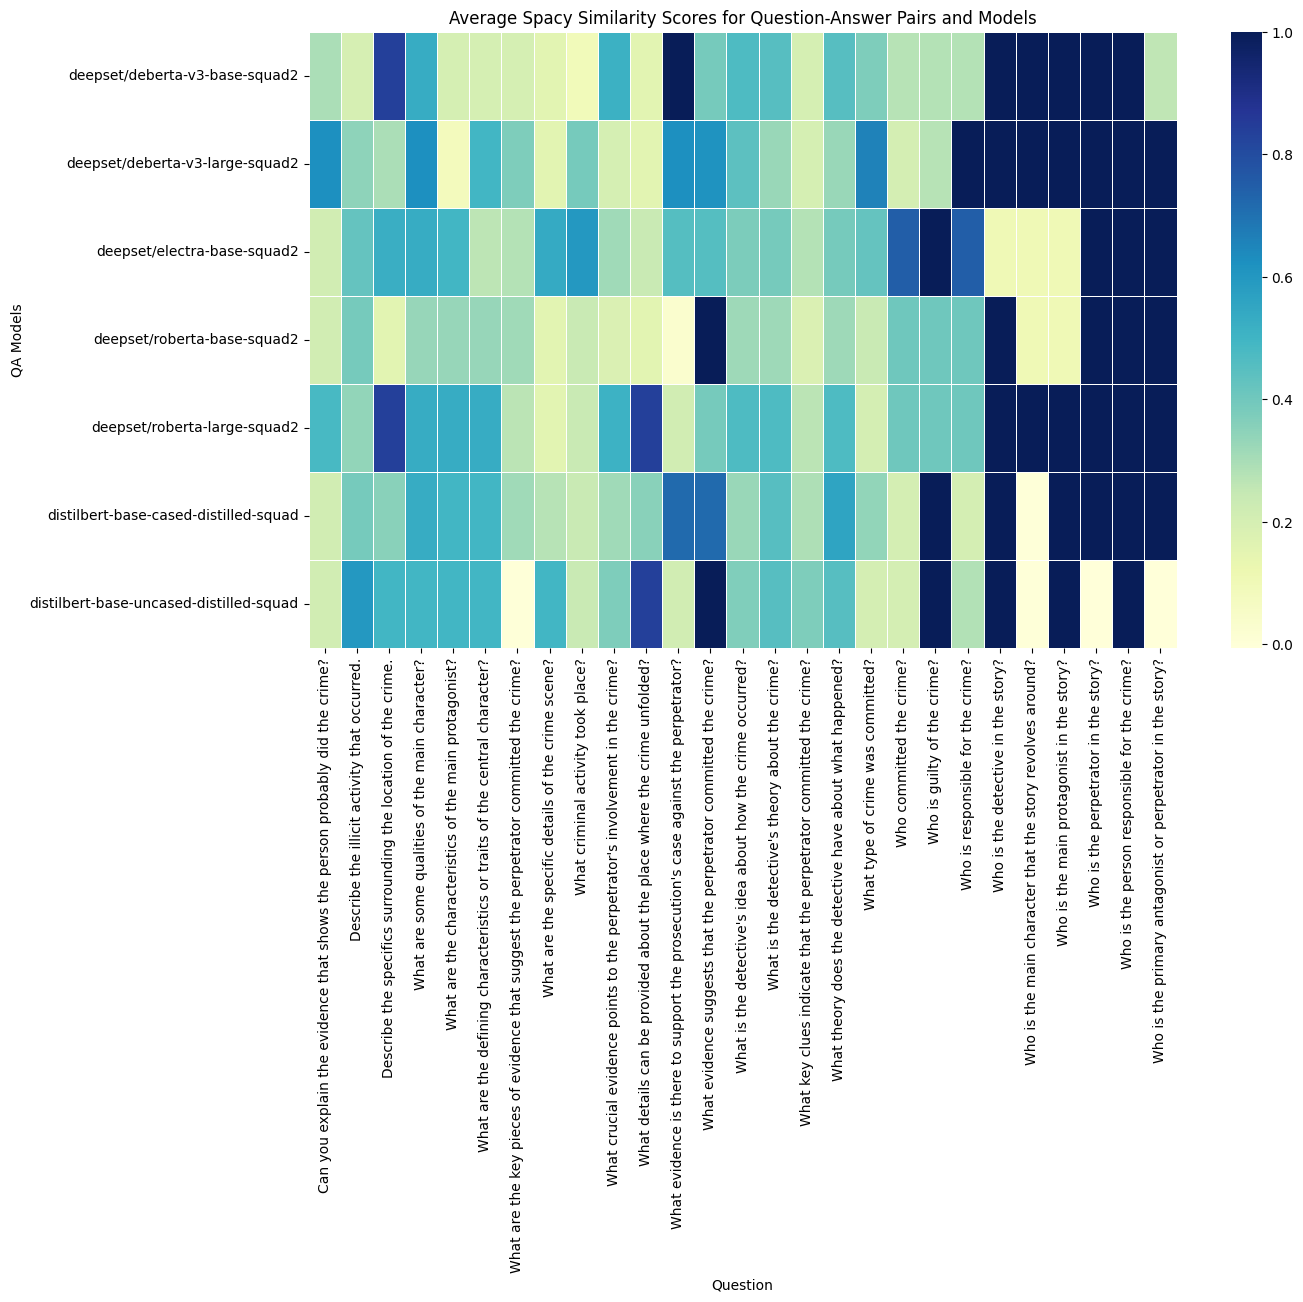

In [100]:
pivot_df = qadf.pivot_table(index='qa_model', columns='q_text', values='spacy_sim', aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Average Spacy Similarity Scores for Question-Answer Pairs and Models')
plt.xlabel('Question')
plt.ylabel('QA Models')
plt.show()